In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
full_data = pd.read_csv('/content/titanic_cleaned.csv')

In [3]:
# Data shape
print('train data:',full_data.shape)

train data: (889, 9)


In [4]:
# View first few rows
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [5]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    int64  
 7   Q         889 non-null    int64  
 8   S         889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [6]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict

In [7]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [8]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("---"*10)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (711, 8)
Shape of y_train:  (711,)
------------------------------
Shape of x_test:  (178, 8)
Shape of y_test:  (178,)


1.LOGISTIC REGRESSION

MOdel Training

In [9]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

Model Evaluation


Logistic regression

In [10]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 82.02 %


Precision: 0.85
Recall: 0.66
------------------------------------------------------------
[[99  8]
 [24 47]]


<Axes: >

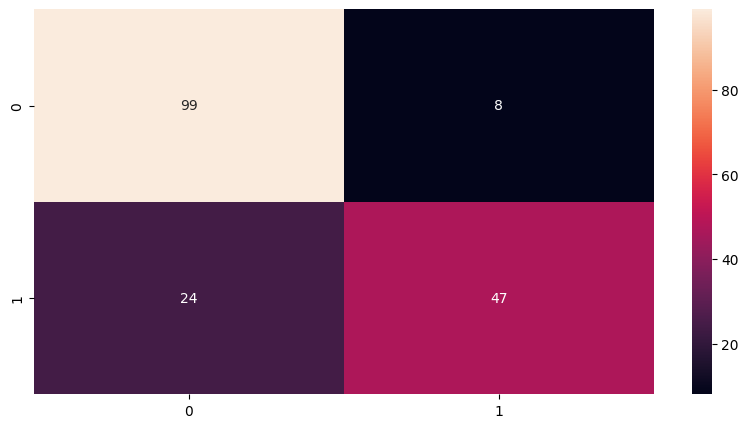

In [11]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

2. Decision Tree



Model Training

In [12]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

Model Evalution


Decision Tree Classifier

In [13]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 78.65 %


Precision: 0.72
Recall: 0.76
------------------------------------------------------------


<Axes: >

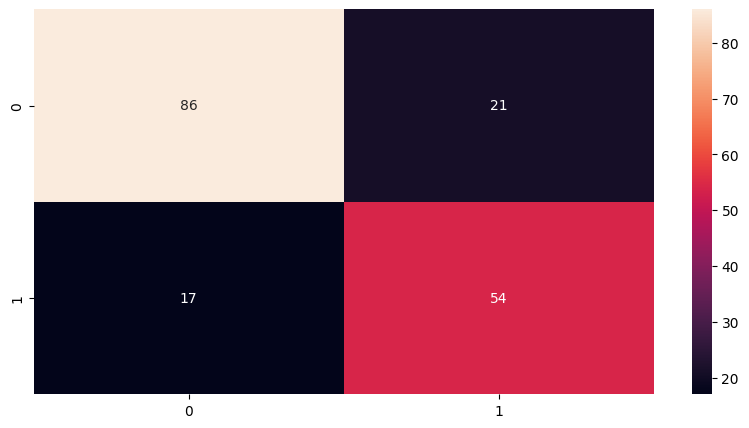

In [15]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)
sns.heatmap(confusion, annot=True, fmt="d")

3. Random Forest


Model Training

In [16]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

Model Evaluation


Random Forest

In [17]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 82.58 %


Precision: 0.80
Recall: 0.75
------------------------------------------------------------


<Axes: >

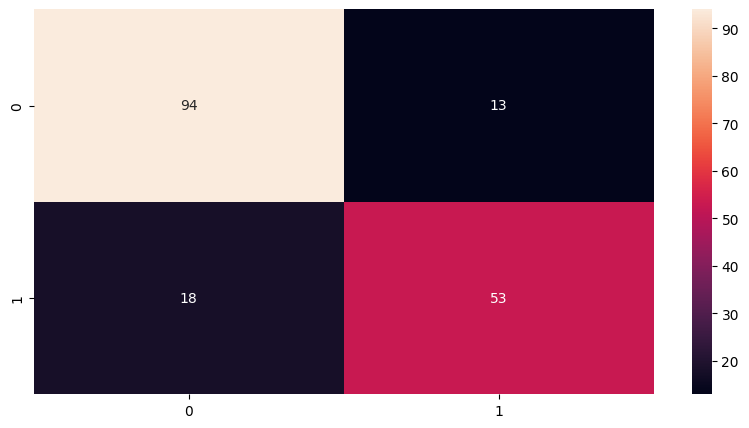

In [18]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

4. Gradient Bossting Classifier


Model Training

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)


Gradient Boosting Classifier


GradientBoostingClassifier()

Model Evalution


Gradient Boosting

In [20]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 84.27 %


Precision: 0.83
Recall: 0.76
------------------------------------------------------------


<Axes: >

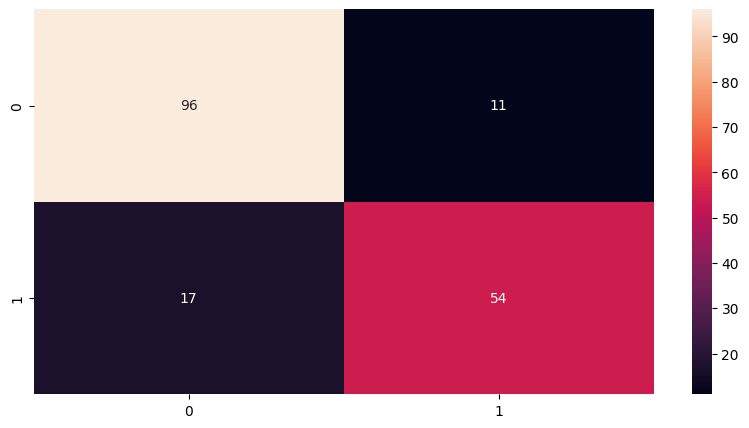

In [21]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

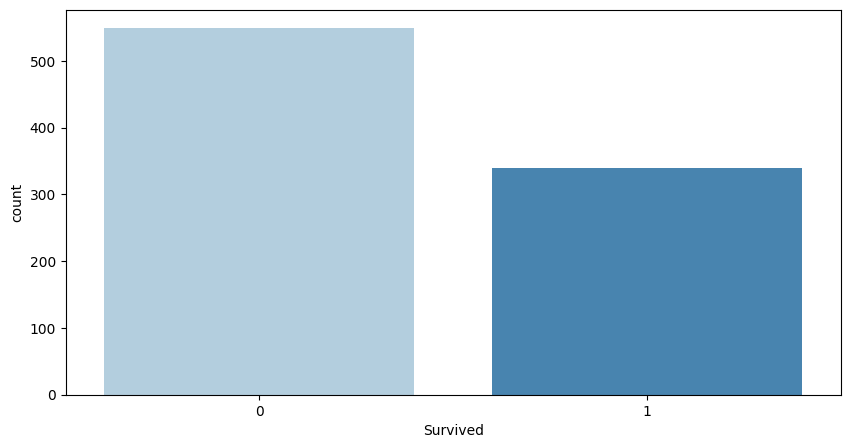

In [22]:
sns.countplot(x="Survived", data=full_data, palette="Blues");
plt.show()

In [23]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": 82.02,
    "Decision Tree Classifier": 80.34,
    "Random Forest Classifier": 82.58,
    "Gradient Boosting Classifier": 84.27
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 84.27
2. Random Forest Classifier: 82.58
3. Logistic Regression: 82.02
4. Decision Tree Classifier: 80.34
